## K-menas法

In [1]:
%load_ext lab_black

In [2]:
# ライブラリーのインストール
import numpy as np
import pandas as pd

# 可視化
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

%matplotlib inline
sns.set_style("whitegrid")

# 正規化のためのクラス
from sklearn.preprocessing import StandardScaler

# k-means法に必要なものをインポート
from sklearn.cluster import KMeans

In [3]:
# irisデータ
from sklearn.datasets import load_iris

# データ読み込み
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
# データフレームに格納
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris["target"] = iris.target  # アヤメの種類（正解ラベル）
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Text(0, 0.5, 'petal_width')

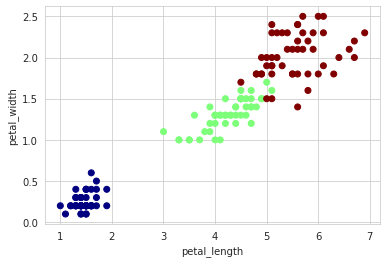

In [5]:
# 2変数の散布図（正解ラベルで色分け）
plt.scatter(
    df_iris["petal length (cm)"],
    df_iris["petal width (cm)"],
    c=df_iris.target,
    cmap=mpl.cm.jet,
)
plt.xlabel("petal_length")
plt.ylabel("petal_width")

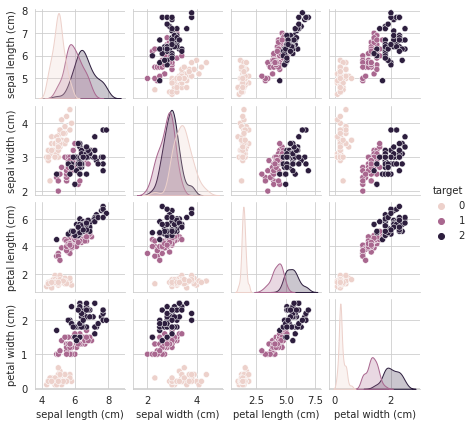

In [6]:
# 散布図行列（正解ラベルで色分け）
sns.pairplot(df_iris, hue="target", height=1.5)

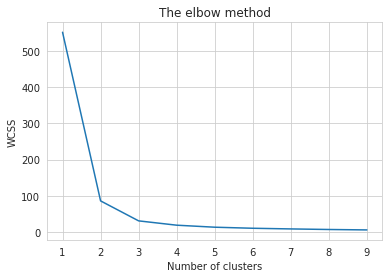

In [7]:
# Elbow Method
wcss = []

for i in range(1, 10):
    kmeans = KMeans(
        n_clusters=i, init="k-means++", max_iter=300, n_init=30, random_state=0
    )
    kmeans.fit(df_iris.iloc[:, 2:4])
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 10), wcss)
plt.title("The elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [8]:
# モデリング
clf = KMeans(n_clusters=3, random_state=1)
clf.fit(df_iris.iloc[:, 2:4])

KMeans(n_clusters=3, random_state=1)

In [9]:
# 学習データのクラスタ番号
clf.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [10]:
# 未知データに対してクラスタ番号を付与
# 今回は学習データに対して予測しているので、`clf.labels_` と同じ結果
y_pred = clf.predict(df_iris.iloc[:, 2:4])
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

Text(0.5, 1.0, 'Predict')

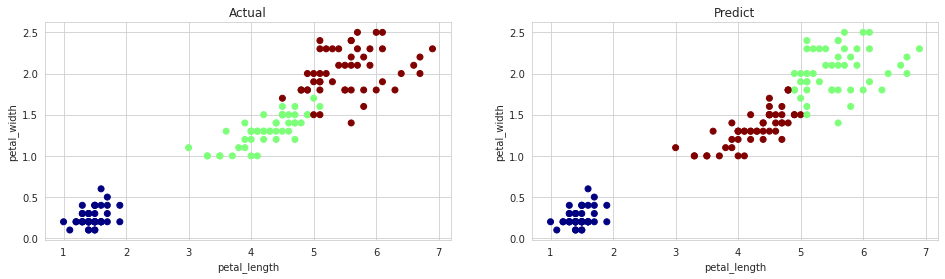

In [11]:
# 実際の種類とクラスタリングの結果を比較
fig, (ax1, ax2) = plt.subplots(figsize=(16, 4), ncols=2)

# 実際の種類の分布
ax1.scatter(
    df_iris["petal length (cm)"],
    df_iris["petal width (cm)"],
    c=df_iris.target,
    cmap=mpl.cm.jet,
)
ax1.set_xlabel("petal_length")
ax1.set_ylabel("petal_width")
ax1.set_title("Actual")
# クラスター分析で分類されたクラスタの分布
ax2.scatter(
    df_iris["petal length (cm)"], df_iris["petal width (cm)"], c=y_pred, cmap=mpl.cm.jet
)
ax2.set_xlabel("petal_length")
ax2.set_ylabel("petal_width")
ax2.set_title("Predict")